In [ ]:
!pip install rasterio
!pip install richdem

In [ ]:
import rasterio
from rasterio.plot import show
from pathlib import Path
import os
import shutil
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import richdem as rd

In [ ]:
# Root Directory
Image_Segmentation_Path = '/content/drive/My Drive/Image Segmentation/'

# Inputs/Sources
resized_input = Image_Segmentation_Path + "Resized Sets/"

In [ ]:
def getitem(df, i, class_values = [-1, 0, 1]):
  """
    Args:
        df (pandas.DataFrame): DataFrame which contains paths to raster images
        i (int): Index of the wanted item
        class_values (list): values of classes to extract from segmentation mask [-1, 0, 1]        
  """
  # read data
  with rasterio.open(df.at[i, 'Input']) as dem:
    dem_array = dem.read(1)
  
  with rasterio.open(df.at[i, 'Target']) as mask:
    mask_array = mask.read(1)
  # extract certain classes from mask (e.g. cars)
  # masks = [(mask_array == v) for v in class_values]
  # mask_array = np.stack(masks, axis=-1).astype('float')
    
  return dem_array, mask_array

In [ ]:
# helper function for data visualization
def visualize(df, i):
  fig, ax = plt.subplots(1, 2, figsize=(8, 8))
  ax[0].axis('off')
  ax[1].axis('off')
  """PLot DEM and its mask."""
  with rasterio.open(df.at[i, 'Input']) as dem:
    show(dem, ax=ax[0])

  with rasterio.open(df.at[i, 'Target']) as mask:
    show(mask, ax=ax[1])    

  plt.show()

In [ ]:
# helper function for data visualization
def visualize_array(dem_array, mask_array):
  """PLot DEM and its mask."""
  dem_rda = rd.rdarray(dem_array, no_data=-32767)
  mask_rda = rd.rdarray(mask_array, no_data=-32767)
  rd.rdShow(dem_rda, axes=False, cmap='viridis')
  rd.rdShow(mask_rda, axes=False)

In [ ]:
def get_files(folder, ext="tif"):
  """get all files with a specified extension in a folder"""
  glob_path = Path(folder)
  return [file for file in glob_path.glob(f"*.{ext}")]

In [ ]:
os.listdir(resized_input)

['DEM Tiles Sets',
 'Annotated Tiles Sets',
 'Slope Tiles Sets',
 'Aspect Tiles Sets',
 'Hillshade Tiles Sets']

In [ ]:
X_dir = ['DEM Tiles Sets', 'Slope Tiles Sets', 'Aspect Tiles Sets', 'Hillshade Tiles Sets']
Y_dir = 'Annotated Tiles Sets'

In [ ]:
inputs_paths = []
targets_paths = []

count = 0
for i in range(len(X_dir)):
  for dir in os.listdir(resized_input + X_dir[i]):
    if dir in os.listdir(resized_input + Y_dir):
      for name in os.listdir(str(Path(resized_input + X_dir[i] + '/' + dir))):
        inputs_paths.append(resized_input + X_dir[i] + '/' + dir + '/' + name)
        targets_paths.append(resized_input + Y_dir + '/' + dir + '/' + name)
        count+=1
    else: count+=1

In [ ]:
print(inputs_paths[713])
len(inputs_paths)

/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/32x64 Tiles/258.tif


10352

In [ ]:
print(targets_paths[713])
len(targets_paths)

/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/32x64 Tiles/258.tif


10352

In [ ]:
data = {'Input': inputs_paths, 'Target' : targets_paths}
df = pd.DataFrame(data)

In [ ]:
dem_array, mask_array = getitem(df, 0)
# visualize_array(dem_array, mask_array)
mask_array.shape
mask_array.transpose(2, 0, 1).astype('float32').squeeze()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)

In [ ]:
df.at[5000, 'Target']

'/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/32x64 Tiles/2810.tif'

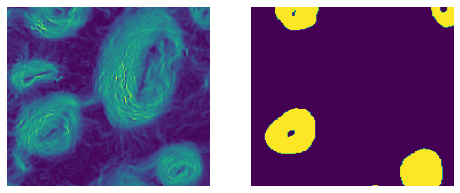

In [ ]:
visualize(df, 3000)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

In [ ]:
count

10352

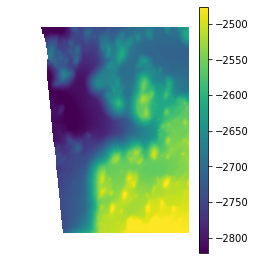

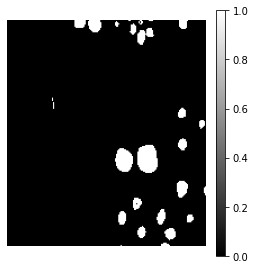

In [ ]:
dem_array, mask_array = getitem(df, 2)
visualize_array(dem_array=dem_array, mask_array=mask_array.transpose(2, 0, 1).astype('float32').squeeze()[2])